## Ejercicio 1

Neurona de HH

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
C = 1.0 # uF/cm^2
gK = 36.0 # mS/cm^2
gNa = 120.0 # mS/cm^2
gL = 0.3 # mS/cm^2
VK = -77.0 # mV
VNa = 50.0 # mV
VL = -54.4 # mV

# Funciones auxiliares
def a_m(V):
    return 0.1*(V+40.0)/(1.0-np.exp(-(V+40.0)/10.0))

def b_m(V):
    return 4.0*np.exp(-(V+65.0)/18.0)

def a_h(V):
    return 0.07*np.exp(-(V+65.0)/20.0)

def b_h(V):
    return 1.0/(1.0+np.exp(-(V+35.0)/10.0))

def a_n(V):
    return 0.01*(V+55.0)/(1.0-np.exp(-(V+55.0)/10.0))

def b_n(V):
    return 0.125*np.exp(-(V+65.0)/80.0)

def m_inf(V):
    return a_m(V)/(a_m(V)+b_m(V))

def h_inf(V):
    return a_h(V)/(a_h(V)+b_h(V))

def n_inf(V):
    return a_n(V)/(a_n(V)+b_n(V))

def tau_m(V):
    return 1.0/(a_m(V)+b_m(V))

def tau_h(V):
    return 1.0/(a_h(V)+b_h(V))

def tau_n(V):
    return 1.0/(a_n(V)+b_n(V))

def dmdt(m, t, V):
    return (m_inf(V) - m)/tau_m(V)

def dhdt(h, t, V):
    return (h_inf(V) - h)/tau_h(V)

def dndt(n, t, V):
    return (n_inf(V) - n)/tau_n(V)

def s_inf(V):
    return 0.5 * (1 + np.tanh(V / 5))

def dsdt(s, V):
    tau = 3 #ms
    return (s_inf(V) - s) / tau

# Me creo una función que me resuelva HH
def HH_solve(I1, I2, Vsyn, gsyn):
    dt = 0.05 # ms
    t = np.arange(0, 460, dt)

    # Inicializo las simulaciones
    # Neurona 1
    V1 = np.empty(len(t))
    V1[0] = -65.0
    m1 = np.empty(len(t))
    m1[0] = 0.9*m_inf(V1[0])
    h1 = np.empty(len(t))
    h1[0] = 0.9*h_inf(V1[0])
    n1 = np.empty(len(t))
    n1[0] = 0.9*n_inf(V1[0])
    # Neurona 2
    V2 = np.empty(len(t))
    V2[0] = -60.0
    m2 = np.empty(len(t))
    m2[0] = 0.5*m_inf(V2[0])
    h2 = np.empty(len(t))
    h2[0] = 0.5*h_inf(V1[0])
    n2 = np.empty(len(t))
    n2[0] = 0.5*n_inf(V2[0])
    # Interacción
    s1 = np.empty(len(t))
    s1[0] = 0.5*s_inf(V1[0])
    s2 = np.empty(len(t))
    s2[0] = 0.5*s_inf(V2[0])


    nsim = 10/dt

    for i in range(1, len(t)):
        V1[i] = V1[i-1] + dt*(I1 - gsyn * s1[i-1] * (V1[i-1] - Vsyn) - gK*n1[i-1]**4*(V1[i-1]-VK) - gNa*m1[i-1]**3*h1[i-1]*(V1[i-1]-VNa) - gL*(V1[i-1]-VL))/C
        m1[i] = m1[i-1] + dt*dmdt(m1[i-1], t[i-1], V1[i-1])
        h1[i] = h1[i-1] + dt*dhdt(h1[i-1], t[i-1], V1[i-1])
        n1[i] = n1[i-1] + dt*dndt(n1[i-1], t[i-1], V1[i-1])

        V2[i] = V2[i-1] + dt*(I2 - gsyn * s2[i-1] * (V2[i-1] - Vsyn) - gK*n2[i-1]**4*(V2[i-1]-VK) - gNa*m2[i-1]**3*h2[i-1]*(V2[i-1]-VNa) - gL*(V2[i-1]-VL))/C
        m2[i] = m2[i-1] + dt*dmdt(m2[i-1], t[i-1], V2[i-1])
        h2[i] = h2[i-1] + dt*dhdt(h2[i-1], t[i-1], V2[i-1])
        n2[i] = n2[i-1] + dt*dndt(n2[i-1], t[i-1], V2[i-1])

        s1[i] = s1[i-1] + dt*dsdt(s1[i-1], V2[i-1])
        s2[i] = s2[i-1] + dt*dsdt(s2[i-1], V1[i-1])
    
    return t,V1,V2

# Función para calcular la frecuencia de los spikes
def HH_freq(V):
    dt = 0.01
    t = []
    
    for i in range(1, len(V)-1):
        if V[i] > 0 and V[i-1] < 0:
            t.append(i)
    
    return (t[1]-t[0])*dt

def HH_freq_aux(V):
    dt = 0.01
    t = []
    
    for i in range(1, len(V)-1):
        if V[i] > 0 and V[i-1] < 0:
            t.append(i)

    return t

# Función para calcular el desfasaje entre dos señales
def HH_phase(V1, V2):
    dt = 0.01 # ms
    freq_1 = HH_freq_aux(V1)
    freq_2 = HH_freq_aux(V2)

    return 2 * np.pi * np.abs(freq_1[1] - freq_2[0]) / (freq_1[1] - freq_1[0])

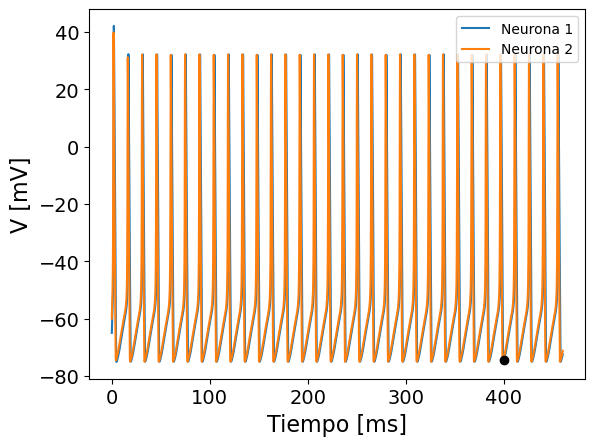

In [149]:
t, V1, V2 = HH_solve(10.0, 10.0, 0, 0)

plt.plot(t, V1, label='Neurona 1')
plt.plot(t, V2, label='Neurona 2')
plt.xlabel('Tiempo [ms]', fontsize=16)
plt.ylabel('V [mV]', fontsize=16)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.xlim(0, 150)
plt.savefig('Fig1_b.pdf', bbox_inches='tight')

In [123]:
# Hallo el desfasaje y la frecuencia de disparo en función de gsyn
g_var = np.linspace(0, 2, 50)

t_g = np.arange(0, 460, 0.05)
V10_g = np.empty((g_var.size, t_g.size))
V20_g = np.empty((g_var.size, t_g.size))

V180_g = np.empty((g_var.size, t_g.size))
V280_g = np.empty((g_var.size, t_g.size))

for i, g in enumerate(g_var):
    _, V10_g[i], V20_g[i] = HH_solve(10.0, 10.0, 0, g)
    _, V180_g[i], V280_g[i] = HH_solve(10.0, 10.0, -80, g)

In [150]:
N = 8000
M = -1

phase_in = np.empty(g_var.size)
freq_in = np.empty(g_var.size)

phase_ex = np.empty(g_var.size)
freq_ex = np.empty(g_var.size)

for i in range(g_var.size):
    phase_ex[i] = HH_phase(V10_g[i][N:M], V20_g[i][N:M])
    freq_ex[i] = HH_freq(V10_g[i][N:M])
    phase_in[i] = HH_phase(V180_g[i][N:M], V280_g[i][N:M])
    freq_in[i] = HH_freq(V180_g[i][N:M])

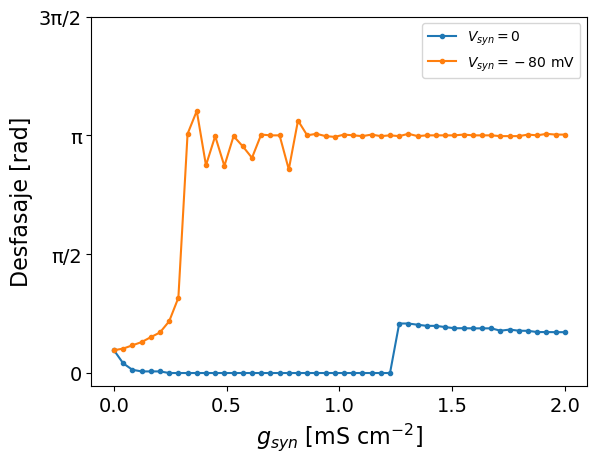

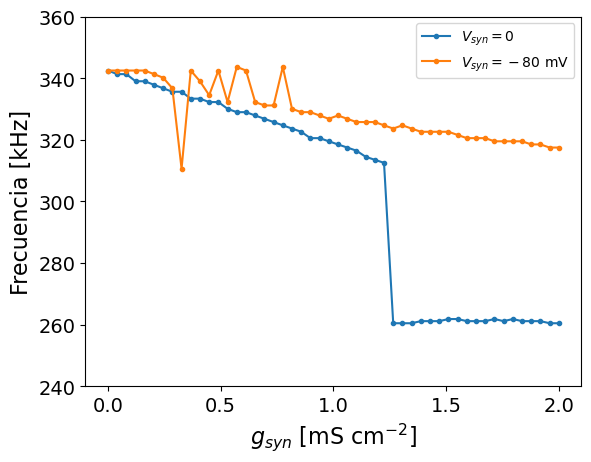

In [163]:
plt.figure()
plt.plot(g_var, phase_ex, '.-', label= '$V_{syn} = 0$')
plt.plot(g_var, phase_in, '.-', label = '$V_{syn} = -80$ mV')
plt.xlabel('$g_{syn}$ [mS cm$^{-2}$]', fontsize=16)
plt.ylabel('Desfasaje [rad]', fontsize=16)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yticks([0, np.pi/2, np.pi, 3 * np.pi/2], ['0', 'π/2', 'π', '3π/2'])
plt.savefig('phase.pdf', bbox_inches = 'tight')

plt.figure()
plt.plot(g_var, 1000 * 1/freq_ex, '.-', label='$V_{syn} = 0$')
plt.plot(g_var, 1000 * 1/freq_in, '.-', label = '$V_{syn} = -80$ mV')
plt.xlabel('$g_{syn}$ [mS cm$^{-2}$]', fontsize=16)
plt.ylabel('Frecuencia [kHz]', fontsize=16)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim(240, 360)
plt.savefig('freq.pdf', bbox_inches = 'tight')